### Solution for Wolt Assignment 
- Author: Tra-Anh Nguyen
- Date: 22-Sep-2021

Import python scripts from local directory. The solution includes 2 main parts, running by the following order : 
 1. **etl.py** : a simple pipeline to create tables in SQL database ( SQLite in this case due to the simplicity) and load data from csv files, located in **data** folder 
 2. **dataanalysis.py** : this is the main part of the solution, answering the questions in the assignment 

In [23]:
# Import python scripts from local dir 
from etl import *
from dataanalysis import *
import matplotlib.pyplot as plt


In [24]:
!python 'etl.py' 
# Run this script for setting up the environment locally. Trying to replicate real-life process when we are fetching data from db. 
# However, we could of course load data directly from local path to this excercise , without using sql db 

In [25]:
#!python 'dataanalysis.py' # Run this script for displaying quickly the solution for the assignment 

Let's take a closer look into the answers above

#### Part 1 : Default radius and total hours of reduction
##### a. Define the default radius over the provided timeframe

In this solution, default radius is defined as the one which has the **longest duration per a certain period**. 
Let's agree on terms used in this excerise
- **Duration** of each event is the time between event started timestamp and event ended timestamp. Duration is calculated by getting event ended timestamp minus event started timestamp 
- **Periods** is considered as the seasonality factor of this data. In the scope of this solution, periods are considered from monthly, hourly and weekday level. The default answer displayed above is taking monthly as a default parameter

In [26]:
period_list = ['month','weekday','hour','dayofyear']

cur, conn = db_connection()
period = 'month'# changing to hour, weekday for more insights. default is month
df_source_radius = dataframe_from_sql_query(conn, delivery_radius_log) 
delivery_radius_event_duration = delivery_radius_event_duration(df_source_radius, period)

Here is the delivery radius source data in DataFrame format. The earliest event started timstamp is '2020-01-01 12:19:29.71' and latest is '2020-12-24 20:10:47.121'

In [27]:
df_source_radius.head()

,DELIVERY_AREA_ID,DELIVERY_RADIUS_METERS,EVENT_STARTED_TIMESTAMP
0,58fcc796a3284104e8f7ccb9,4000,2020-01-01 12:19:29.719
1,58fcc796a3284104e8f7ccb9,6500,2020-01-01 12:31:40.325
2,58fcc796a3284104e8f7ccb9,3500,2020-01-01 12:53:10.538
3,58fcc796a3284104e8f7ccb9,6500,2020-01-01 13:11:36.094
4,58fcc796a3284104e8f7ccb9,3500,2020-01-01 13:32:26.754


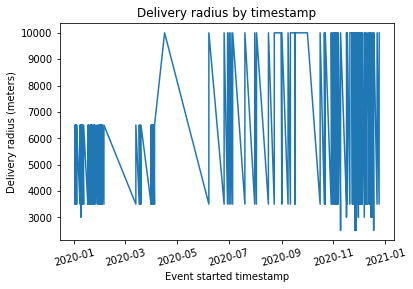

In [28]:
plt.figure(1)
plt.plot(df_source_radius['EVENT_STARTED_TIMESTAMP'],df_source_radius['DELIVERY_RADIUS_METERS'])
plt.xticks(rotation=15)
plt.xlabel('Event started timestamp')
plt.ylabel('Delivery radius (meters)')
plt.title('Delivery radius by timestamp')
plt.show()

If we consider 'full' 2020 timeframe, starting from **2020-01-01 00:00:00.00**, we are not clear yet which delivery radius stands out during the period from **2020-01-01 00:00:00.00 to 2020-01-01 12:19:29.718**. 

We are ignoring this 'missing' period since the un-recorded values would not affect overal result when we are considering it over 1 year period.

After some data manipulation, here is the data set we get

In [29]:
delivery_radius_event_duration.head(20)

,DELIVERY_AREA_ID,DELIVERY_RADIUS_METERS,EVENT_STARTED_TIMESTAMP,EVENT_PERIOD,EVENT_ENDED_TIMESTAMP,DURATION
0,NaN,NaN,2020-01-01 00:00:00.000,1,2020-01-01 00:59:59.999,0.999722
1,NaN,NaN,2020-01-01 01:00:00.000,1,2020-01-01 01:59:59.999,0.999722
2,NaN,NaN,2020-01-01 02:00:00.000,1,2020-01-01 02:59:59.999,0.999722
3,NaN,NaN,2020-01-01 03:00:00.000,1,2020-01-01 03:59:59.999,0.999722
4,NaN,NaN,2020-01-01 04:00:00.000,1,2020-01-01 04:59:59.999,0.999722
5,NaN,NaN,2020-01-01 05:00:00.000,1,2020-01-01 05:59:59.999,0.999722
6,NaN,NaN,2020-01-01 06:00:00.000,1,2020-01-01 06:59:59.999,0.999722
7,NaN,NaN,2020-01-01 07:00:00.000,1,2020-01-01 07:59:59.999,0.999722
8,NaN,NaN,2020-01-01 08:00:00.000,1,2020-01-01 08:59:59.999,0.999722
9,NaN,NaN,2020-01-01 09:00:00.000,1,2020-01-01 09:59:59.999,0.999722


Some artificial rows, by hourly level, are added into the original dataset. As mentioned above, for the first 12 rows, we are ignoring the delivery radius values and they are recorded as NaN.


For the rest, we are using the assumption that for a hour-level artificial row added into the original dataset, its delivery radius value will be the delivery radius value of the next row or the next hour.

The examples below display more clearly how the data is transformed 
- the 1st dataframe is delivery radius of a certain event 
- the 2nd dataframe is processed delivery radius , which include:
    - artifical hour-level rows (for the ease of default calculation), 
    - event_ended_timestamp calculated by getting the time before the next event starts, 
    - duration is the time between event_ended_timestamp and event_started_timestamp for each event
    - event_period calculated which period the event belongs to. 

In [30]:
event_date = '2020-01-01 12:31:40.325' # you could change the value of this event_date here to see clearly how data is transformed
df_source_radius[df_source_radius['EVENT_STARTED_TIMESTAMP'] >= event_date].head()


,DELIVERY_AREA_ID,DELIVERY_RADIUS_METERS,EVENT_STARTED_TIMESTAMP
1,58fcc796a3284104e8f7ccb9,6500,2020-01-01 12:31:40.325
2,58fcc796a3284104e8f7ccb9,3500,2020-01-01 12:53:10.538
3,58fcc796a3284104e8f7ccb9,6500,2020-01-01 13:11:36.094
4,58fcc796a3284104e8f7ccb9,3500,2020-01-01 13:32:26.754
5,58fcc796a3284104e8f7ccb9,6500,2020-01-01 13:59:11.104


In [31]:
delivery_radius_event_duration[delivery_radius_event_duration['EVENT_STARTED_TIMESTAMP'] >= event_date].head()


,DELIVERY_AREA_ID,DELIVERY_RADIUS_METERS,EVENT_STARTED_TIMESTAMP,EVENT_PERIOD,EVENT_ENDED_TIMESTAMP,DURATION
14,58fcc796a3284104e8f7ccb9,6500.0,2020-01-01 12:31:40.325,1,2020-01-01 12:53:10.537,0.358333
15,58fcc796a3284104e8f7ccb9,3500.0,2020-01-01 12:53:10.538,1,2020-01-01 12:59:59.999,0.113611
16,58fcc796a3284104e8f7ccb9,3500.0,2020-01-01 13:00:00.000,1,2020-01-01 13:11:36.093,0.193333
17,58fcc796a3284104e8f7ccb9,6500.0,2020-01-01 13:11:36.094,1,2020-01-01 13:32:26.753,0.347222
18,58fcc796a3284104e8f7ccb9,3500.0,2020-01-01 13:32:26.754,1,2020-01-01 13:59:11.103,0.445556


After getting this dataset, we are going to sum up the duration by event_period and delivery_radius. the delivery radius which has max duration per event period would be chosen as the default radius of that period.

**Here is the result illustrating the default delivery radius by**

In [32]:
df_default_radius = default_radius_calculation(df_source_radius, period)
df_default_radius

,EVENT_PERIOD,DURATION,DELIVERY_RADIUS_METERS
0,1,691.855833,6500.0
1,2,691.568056,6500.0
2,3,736.605556,6500.0
3,4,359.886389,6500.0
4,5,743.793333,10000.0
5,6,718.463889,10000.0
6,7,741.065556,10000.0
7,8,740.029722,10000.0
8,9,718.373889,10000.0
9,10,738.329444,10000.0


When considering from monthly perspective, the default radius are 6500 from January to April and being 10000 for the rest of the year.

Notice that in May, in the original delivery radius data set, we are having no new event logged so the artificial events in May are calculated under the assumption that the radius remain the same since the last recorded day in April and we are using this as the radius values in May

Also, in April there is a surge in data


##### b. Total hours of reduction


- When comparing the radius of a certain event against the 'default' radius of corresponding period ( for example the default radius of Jan is 6500 so in Jan, if we are having events, which have radius smaller than 6500 then we are considering these events as radius reduction events) , we are summing up the duration of radius reduction events to generate the total hours of radius reduction over 1 year period


In [33]:
# calculating the total hours of reduction and the dataset displays events which experience radius reduction
# compared against the default period
total_hours_by_period, df_radius_reduction = total_hours_radius_reduction(df_source_radius, period)
print('Total hours of reduction over the given timeframe, compared against default radius: ', total_hours_by_period)
print('Events which experience radius reduction, compared against the default radius: ')
df_radius_reduction.head()

Total hours of reduction over the given timeframe, compared against default radius:  201.31888888888892
Events which experience radius reduction, compared against the default radius: 


,DELIVERY_AREA_ID,DELIVERY_RADIUS_METERS,EVENT_STARTED_TIMESTAMP,EVENT_PERIOD,EVENT_ENDED_TIMESTAMP,DURATION,DURATION_DEFAULT,DELIVERY_RADIUS_METERS_DEFAULT
13,58fcc796a3284104e8f7ccb9,4000.0,2020-01-01 12:19:29.719,1,2020-01-01 12:31:40.324,0.202778,691.855833,6500.0
15,58fcc796a3284104e8f7ccb9,3500.0,2020-01-01 12:53:10.538,1,2020-01-01 12:59:59.999,0.113611,691.855833,6500.0
16,58fcc796a3284104e8f7ccb9,3500.0,2020-01-01 13:00:00.000,1,2020-01-01 13:11:36.093,0.193333,691.855833,6500.0
18,58fcc796a3284104e8f7ccb9,3500.0,2020-01-01 13:32:26.754,1,2020-01-01 13:59:11.103,0.445556,691.855833,6500.0
40,58fcc796a3284104e8f7ccb9,3500.0,2020-01-02 08:07:36.284,1,2020-01-02 08:54:08.013,0.775278,691.855833,6500.0


- However, there could be another approach, by not using default radius, but considering events which have radius reduction if their delivery radius meters are smaller than the delivery radius meters of the previous event. By using this approach, this is the solution we could produce 

In [34]:
# calculating the total hours of reduction and the dataset displays events which experience radius reduction
# compared against the previous event
total_hours, df_event_radius_reduction = total_hours_radius_reduction_original_source(df_source_radius)
print('Total hours of reduction over the given timeframe, compared against the previous event: ',total_hours)
print('Events which experience radius reduction, compared against the previous event: ')
df_event_radius_reduction.head()

Total hours of reduction over the given timeframe, compared against the previous event:  50.3286111111111
Events which experience radius reduction, compared against the previous event: 


,DELIVERY_AREA_ID,DELIVERY_RADIUS_METERS,EVENT_STARTED_TIMESTAMP,EVENT_PERIOD,EVENT_ENDED_TIMESTAMP,DURATION
15,58fcc796a3284104e8f7ccb9,3500.0,2020-01-01 12:53:10.538,2020-01-01 12:53:10.538,2020-01-01 12:59:59.999,0.113611
18,58fcc796a3284104e8f7ccb9,3500.0,2020-01-01 13:32:26.754,2020-01-01 13:32:26.754,2020-01-01 13:59:11.103,0.445556
40,58fcc796a3284104e8f7ccb9,3500.0,2020-01-02 08:07:36.284,2020-01-02 08:07:36.284,2020-01-02 08:54:08.013,0.775278
43,58fcc796a3284104e8f7ccb9,3500.0,2020-01-02 09:53:05.853,2020-01-02 09:53:05.853,2020-01-02 09:59:59.999,0.115000
48,58fcc796a3284104e8f7ccb9,3500.0,2020-01-02 12:54:24.997,2020-01-02 12:54:24.997,2020-01-02 12:59:59.999,0.093056


#### Part 2 : Potential loss in revenue 

- For the purchase data, we are having timestamps in UTC. This could be easily converted to local time and inversely ( for example convert the time_received and time_delivered UTC to the local time of the delivery_area, specified above). However, since this is aritificial data, we could considered performing time conversion in improvement work.

- This calculation is using the default radius value by period ( default is by month), for comparing the dropoff distance and default radius values of corresponding event period. If the dropoff distance is larger than the default radius value, we are considering this purchase as a potential loss.

Based on these assumptions, we are having the results as following: 

In [35]:
df_source_purchases = dataframe_from_sql_query(conn, purchases)
loss_revenue, df_potential_loss_purchases = potential_loss_revenue(df_source_purchases, df_source_radius, period)
print('The potential loss of revenue over the given timeframe (in EUR) : ', loss_revenue)
print('Potential purchases might be lost due to the radius reduction')
df_potential_loss_purchases

The potential loss of revenue over the given timeframe (in EUR) :  8892.999999999996
Potential purchases might be lost due to the radius reduction


,PURCHASE_ID,TIME_RECEIVED,TIME_DELIVERED,DELIVERY_METHOD,END_AMOUNT_WITH_VAT_EUR,DROPOFF_DISTANCE_STRAIGHT_LINE_METRES,EVENT_PERIOD,DURATION,DELIVERY_RADIUS_METERS
70333,5e9811d33f76920980c3e334,2020-04-16 08:05:39.485,2020-04-16 08:51:46.422,homedelivery,50.4,6750,4,359.886389,6500.0
71098,5e995c3555526fc5769df18e,2020-04-17 07:35:17.359,2020-04-17 08:46:02.992,homedelivery,52.8,6719,4,359.886389,6500.0
71345,5e99957e8290078e42f068ae,2020-04-17 11:39:42.103,2020-04-17 12:25:14.915,homedelivery,99.4,8326,4,359.886389,6500.0
71432,5e99a5abc17459e8ad29eaee,2020-04-17 12:48:43.086,2020-04-17 14:06:35.322,homedelivery,77.3,7430,4,359.886389,6500.0
71451,5e99a923458dc3b83aac1cbf,2020-04-17 13:03:31.666,2020-04-17 13:40:57.259,homedelivery,81.1,6824,4,359.886389,6500.0
...,...,...,...,...,...,...,...,...,...
83600,5eaaeeff4a3fcf21f4e07d05,2020-04-30 15:30:07.357,2020-04-30 16:08:30.673,homedelivery,39.9,6797,4,359.886389,6500.0
83608,5eaaeff2a53779efc51b777f,2020-04-30 15:34:10.960,2020-04-30 16:04:38.766,homedelivery,37.9,6512,4,359.886389,6500.0
83683,5eaafd2bede275aff169e065,2020-04-30 16:30:35.292,2020-04-30 17:49:15.304,homedelivery,50.9,8266,4,359.886389,6500.0
83792,5eab121ebe149e437a7de42d,2020-04-30 17:59:58.733,2020-04-30 19:11:09.439,homedelivery,42.9,6761,4,359.886389,6500.0


### 1. What assumptions about the data have you made to produce the dataset(s)?
- All hours are equal, 24/7 operating hours in this dataset while in fact, the actual operating time might be from 10AM to 11PM and not all hours are peak hours.
- Assuming that some missing values, for example, a few hours of recorded data in the first 12 hours of the first day of the year as mentioned above, are insignificant
- Similar assumption for no recorded values in May 
- Ignoring the significant surge/ change in April data
- In overal, the seasonality of the data set is not considered fully.

### 2. Why did you decide to go with this particular approach and what could be the pros and cons of applying it?

For both tasks, I am using default radius by period (month as default) for the calculation.
This is a simple approach when aggregating data by peiod for further mapping and joining. 
However, the result might not precise, and could vary depending on the time perspective , for example, when looking into the dataset by hourly or weekday level, we might see different insights.
- Pros: 
    - less complex solution and less time-consuming and allow to filter/aggregate the data from different time perspectives
- Cons: 
    - the result might not precise. When calculating default radius by larger period. For example, when calculating the result in month level, we might ignore the fluctuation of radius within a day or within a week.
    - seasonality and the critical change period (peak hours) might not be captured fully.
    - Task 2 might not be resolved completely since during period where we have radius reduction ( the radius smaller than default radius and occur randomly during a day - radius change on hourly level) we would lose potential purchases due to that but in the current solution, it is not able to map the specific purchases to the corresponding specific hourly period of radius reduction. 
    

### 3. How could the solution be improved if given more time and data?
- Task 2 could be improved when comparing dropoff distance of certain event against more precise default period.Since the default period is defined for monthly period, it could not capture all cases for example during time when radius is reduced within a day.
- there are options to filter/aggregate data by hour- and weekday- level but this needs futher refinement 
- might be better visualizations 